In [3]:
import numpy as np
import matplotlib.pyplot as plt

totalExpected = 11.6+2.72
totalExpectedE = 2.8+0.02

toyExpCollection = []

for i in range(0,30000+1):

    expectedToy = np.random.normal(totalExpected, totalExpectedE)
    observedToyExp = np.random.poisson(expectedToy)
    
    toyExpCollection.append(observedToyExp)

    
binNumber = max(toyExpCollection) - min(toyExpCollection)

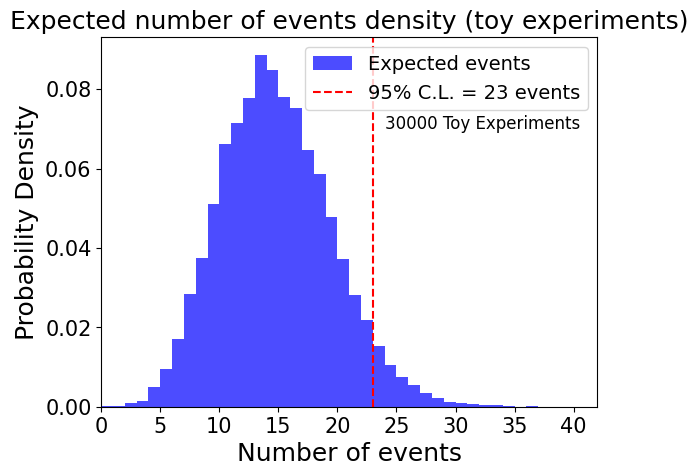

In [4]:
histogram = plt.hist(toyExpCollection, bins=binNumber, density=True, alpha=0.7, color='blue', label='Expected events')

# Add labels and a legend
plt.xlabel('Number of events',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.title('Expected number of events density (toy experiments)',fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0, 42)

plt.text(24,0.07,'30000 Toy Experiments', fontsize=12, color='black')

pdf = histogram[0]
CL95 = 0.95*np.sum(pdf)
limit = 0
for i in range(0,len(pdf)):
    if np.sum(pdf[0:i])>=CL95:
        limit = histogram[1][i]
        break

# Add a vertical line
vertical_line_x = limit  # x-coordinate where you want the vertical line
plt.axvline(x=vertical_line_x, color='red', linestyle='--', label='95% C.L. = '+str(int(limit))+ ' events')

plt.legend(fontsize = 14)

# Show the plot
plt.savefig('CL95.pdf',bbox_inches='tight')
plt.show()


# CLs method implementation
You have to activate conda Stats environment

In [24]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil
import pandas as pd

pd = pd.read_csv('CLsInputs.csv')
bkg_array = np.array(pd['Background'])
bkg_error_array = np.array(pd['BackgroundError'])

/var/folders/vz/9jwsmzpn0d7g_dzz8znp1mzw0000gp/T/ipykernel_5013/796204251.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


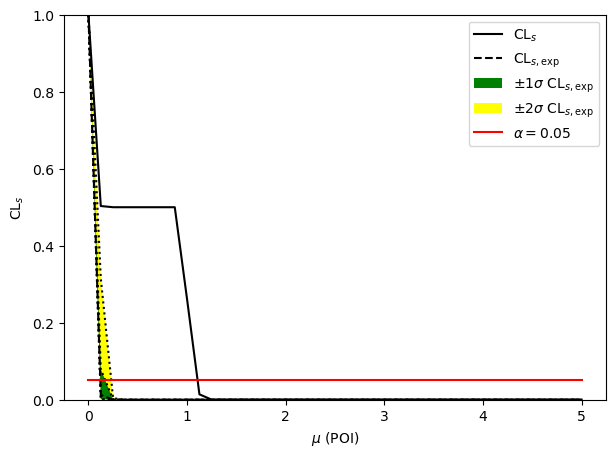

In [25]:
pyhf.set_backend("numpy")
model = pyhf.simplemodels.uncorrelated_background(
    signal=[44.16756821, 97.25202942, 31.0715313,   7.46801853,  0.79225051,  0., 0.        ] ,
    bkg=bkg_array,
    bkg_uncertainty=bkg_error_array,
)
data = [44.16756821, 97.25202942, 31.0715313,   7.46801853,  0.79225051,  0., 0.        ] + model.config.auxdata

poi_vals = np.linspace(0, 5, 41)
results = [
    pyhf.infer.hypotest(
        test_poi, data, model, test_stat="qtilde", return_expected_set=True
    )
    for test_poi in poi_vals
]

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
brazil.plot_results(poi_vals, results, ax=ax)
fig.show()

scan = np.linspace(0, 5, 21)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit( data, model, scan, return_results=True)

In [14]:
obs_limit

array(1.202091)

In [15]:
exp_limits

[array(0.23749077),
 array(0.23749408),
 array(0.23749761),
 array(0.23753298),
 array(0.2384221)]